## Imports

In [1]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy.linalg as lng # linear algebra from scipy library
from scipy.spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

## 4 Implement and solve KNN regression:
> (a) Implement a KNN regression algorithm:

>> (i) Find the K nearest neighbours using a suitable distance metric (e.g. Euclidean). Compute the predicted response as the mean of the K neighbours.



In [27]:
from sklearn.metrics import mean_squared_error
# Implement the algorithm for knn
# it would make sense to test it  by evaluating the MSE
# mse ~ 0.61 for K = 5

def KNN(X,y,k,X_test):
    y_pred = np.zeros(len(X_test))
    for n,i in enumerate(X_test):
        dist_list = [np.linalg.norm(i-j) for j in X]
        arg_sort = np.argsort(dist_list)
        k_nearest = y[arg_sort[1:(k+1)]]
        y_pred_tmp = k_nearest.mean()
        y_pred[n] = y_pred_tmp
    
    return y_pred
        
        
y_pred = KNN(X,y,5,X)
print(mean_squared_error(y,y_pred))

0.6182202180421111


>> (ii) Optional: Compute weights for the neighbours as the proportion of its distance to the total distance for the K nearest neighbours and Compute the predicted response as the (weighted) mean of the K neighbours.

In [49]:
# Implement the algorithm for weighted knn
# it would make sense to test it  by evaluating the MSE
# mse ~ 0.62 for K = 5

def weighted_KNN(X,y,k,X_test):
    y_pred = np.zeros(len(X_test))
    for n,i in enumerate(X_test):
        dist_list = np.array([np.linalg.norm(i-j) for j in X])
        arg_sort = np.argsort(dist_list)
        k_nearest = X[arg_sort[1:(k+1)]]
        total_length = np.sum(dist_list[arg_sort[1:(k+1)]])
#         weights = 1/(dist_list[arg_sort[1:(k+1)]]) 
        weights = (dist_list[arg_sort[1:(k+1)]])/total_length
        weighted_y = np.average(y[arg_sort[1:(k+1)]],weights=weights)

        y_pred[n] = weighted_y
    
    return y_pred
        
y_pred = weighted_KNN(X,y,5,X)
print(mean_squared_error(y,y_pred))

0.6259857090310114


> (b) Find a solution to the diabetes data using KNN regression. Try different options for K.

0.9906281304299507
0.7489552832313054
0.6967107685594466
0.6210688645513982
0.6259857090310114
0.6049296360557423
0.5906046917594541
0.5800959099346612
0.5723340137137584
0.5679414081128754
0.5715113799302974
0.5623399418544716
0.5627850142015967
0.5549847657886113
0.5577413738032735
0.5524075268154103
0.5520745009925498
0.5419933499103249
0.5432306751797656


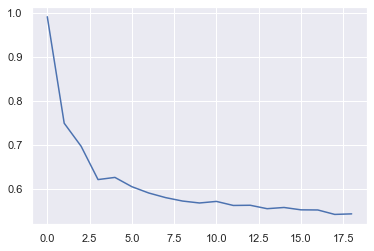

In [50]:
# Use the KNN algorithm previously created with different values for K
# See which value for K gives the best results

ks = [x for x in range(1,20)]
score = []
for k in ks:
    y_pred = weighted_KNN(X,y,k,X)
    
    mse = mean_squared_error(y,y_pred)
    score.append(mse)
    print(mse)
    
plt.plot(score)